https://www.davidpublisher.com/Public/uploads/Contribute/5b5a8959b194f.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pdb, time, torch
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from tqdm import tqdm
from skimage import data
from scipy.ndimage import zoom
from scipy import ndimage, datasets
from scipy.io import loadmat, savemat
from itkwidgets import view
from operators import *

In [2]:
fw_name = 'numpy'
mode = 'gpu'

if fw_name=='torch':
    fw = torch
    if mode=='gpu':
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # after switch device, you need restart the kernel
        torch.cuda.set_device(1)
        torch.set_default_tensor_type('torch.cuda.DoubleTensor')
    else:
        device = torch.device('cpu')
        torch.set_default_dtype(torch.float64)
else:
    fw = np

## 2D

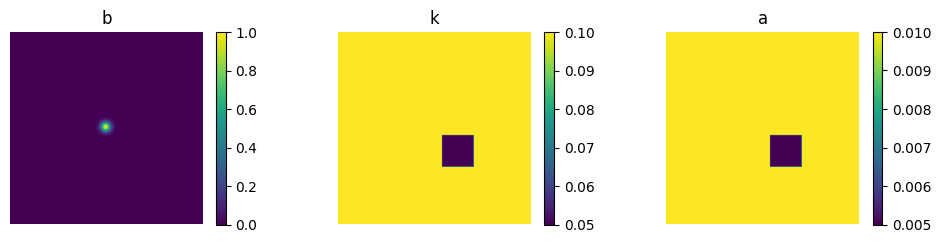

In [3]:
size, h = 128, 1
xx, yy = fw.meshgrid(fw.linspace(1,size,size), fw.linspace(1,size,size), indexing='ij')
b = fw.exp(-((xx-size//2)**2+(yy-size//2)**2)/(2*5))
k = fw.ones_like(b)
k[round(size/2)+5:round(size*2/3)+5,round(size/2)+5:round(size*2/3)+5] = 0.5
a = k*0.01
k = k*0.1
# k = omega**2/c**2
# a = delta*omega**3/c**4

plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.title('b')
if fw_name=='torch': 
    plt.imshow(b.cpu()) 
else: 
    plt.imshow(b)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('k')
if fw_name=='torch': 
    plt.imshow(k.cpu()) 
else: 
    plt.imshow(k)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('a')
if fw_name=='torch': 
    plt.imshow(a.cpu()) 
else: 
    plt.imshow(a)
plt.axis('off')
plt.colorbar()

running time:  2.1061739921569824


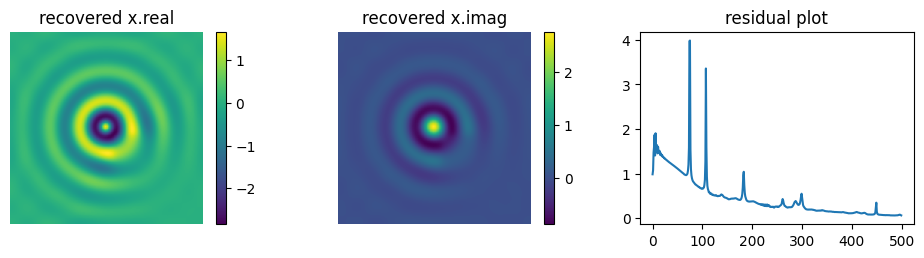

In [7]:
'''helmholtz solver'''
# Ab = A_helmholtz(b, k, h)
# recovered_x, residual_list = helmholtz_cgsolver_psd(Ab, k, h, iteration=1, bc='periodic')
# recovered_x, residual_list = helmholtz_cgsolver_psd_fd(Ab, k, h, iteration=1, bc='periodic')

'''westervelt solver'''
# A*Ax=A*b, where A_westervelt(Ax, k, -delta, h, bc) is the A* (conjugate)
Ab = A_westervelt(b, k, -a, h)
start = time.time()
recovered_x, residual_list = westervelt_cgsolver_psd(Ab, k, a, h, iteration=500, bc='neumann')
print('running time: ', time.time()-start)

plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.title('recovered x.real')
if fw_name=='torch': 
    plt.imshow(recovered_x.real.cpu()) 
else: 
    plt.imshow(recovered_x.real)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('recovered x.imag')
if fw_name=='torch': 
    plt.imshow(recovered_x.imag.cpu()) 
else: 
    plt.imshow(recovered_x.imag)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('residual plot')
plt.plot(residual_list)

## 3D

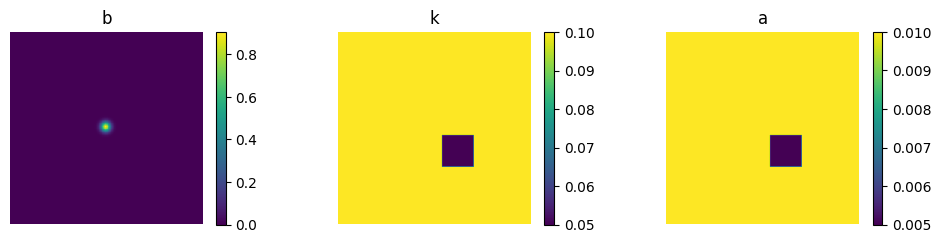

In [3]:
size, h = 128, 1
xx, yy, zz = fw.meshgrid(fw.linspace(1,size,size), fw.linspace(1,size,size), fw.linspace(1,size,size), indexing='ij')
b = fw.exp(-((xx-size//2)**2+(yy-size//2)**2+(zz-size//2)**2)/(2*5))
k = fw.ones_like(b)
k[round(size/2)+5:round(size*2/3)+5, round(size/2)+5:round(size*2/3)+5] = 0.5
a = k*0.01
k = k*0.1
# k = omega**2/c**2
# a = delta*omega**3/c**4

plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.title('b')
if fw_name=='torch': 
    plt.imshow(b[..., size//2].cpu()) 
else: 
    plt.imshow(b[..., size//2])
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('k')
if fw_name=='torch': 
    plt.imshow(k[..., size//2].cpu()) 
else: 
    plt.imshow(k[..., size//2])
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('a')
if fw_name=='torch': 
    plt.imshow(a[..., size//2].cpu()) 
else: 
    plt.imshow(a[..., size//2])
plt.axis('off')
plt.colorbar()

running time:  3.4481704235076904


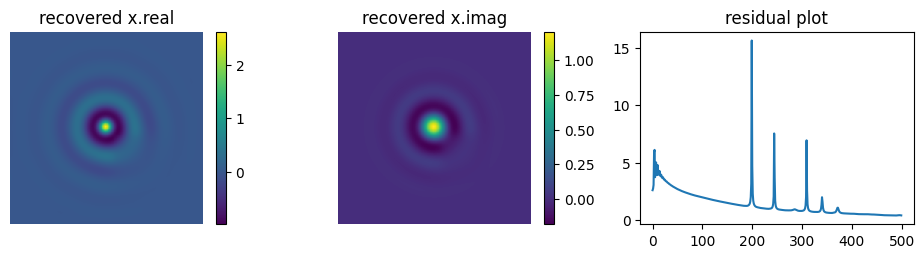

In [4]:
'''helmholtz solver'''
# Ab = A_helmholtz(b, k, h)
# recovered_x, residual_list = helmholtz_cgsolver_psd(Ab, k, h, iteration=500, bc='periodic')

'''westervelt solver'''
# A*Ax=A*b, where A_westervelt(Ax, k, -delta, h, bc) is the A* (conjugate)
Ab = A_westervelt(b, k, -a, h)
start = time.time()
recovered_x, residual_list = westervelt_cgsolver_psd(Ab, k, a, h, iteration=500, bc='neumann')
print('running time: ', time.time()-start)

plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.title('recovered x.real')
if fw_name=='torch': 
    plt.imshow(recovered_x[..., size//2].real.cpu()) 
else: 
    plt.imshow(recovered_x[..., size//2].real)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('recovered x.imag')
if fw_name=='torch': 
    plt.imshow(recovered_x[..., size//2].imag.cpu()) 
else: 
    plt.imshow(recovered_x[..., size//2].imag)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('residual plot')
plt.plot(residual_list)

In [6]:
Ab.shape

torch.Size([128, 128, 128])